In [12]:
%matplotlib inline

In [13]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
# Store filepath in a variable
file4 = "Resources/incidencepercapita.csv"
file_two = "Resources/measles.csv"

In [15]:
# Read our Data file with the pandas library
file1_df = pd.read_csv(file4, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [16]:
# Show just the header
file_two_df.head()

,week,state,state_name,disease,cases,incidence_per_capita
0,192801,AL,ALABAMA,MEASLES,97,3.67
1,192801,AR,ARKANSAS,MEASLES,76,4.11
2,192801,AZ,ARIZONA,MEASLES,8,1.90
3,192801,CA,CALIFORNIA,MEASLES,74,1.38
4,192801,CO,COLORADO,MEASLES,85,8.38


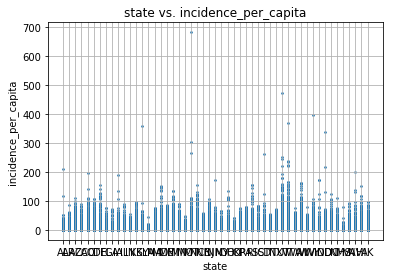

In [55]:
# Build a scatter plot for each data type
plt.scatter(file_two_df["state"], file_two_df["incidence_per_capita"], marker=".", s=10)

# Incorporate the other graph properties
plt.title("state vs. incidence_per_capita")
plt.ylabel("incidence_per_capita")
plt.xlabel("state")
plt.grid(True)

# Show plot
plt.show()

In [19]:
# Set new index to state
file_three_df = file_two_df.set_index("state")
file_three_df.head()

,week,state_name,disease,cases,incidence_per_capita
state,,,,,
AL,192801,ALABAMA,MEASLES,97,3.67
AR,192801,ARKANSAS,MEASLES,76,4.11
AZ,192801,ARIZONA,MEASLES,8,1.90
CA,192801,CALIFORNIA,MEASLES,74,1.38
CO,192801,COLORADO,MEASLES,85,8.38


In [44]:
#Grab the data contained within the "AL" row and "cases" column
AL = file_three_df.loc["AL", "incidence_per_capita"]
AL.head()

state
AL     3.67
AL     6.25
AL     7.95
AL    12.58
AL     8.03
Name: incidence_per_capita, dtype: float64

In [31]:
#Grab the data contained within the "CA" row and "cases" column
CA = file_three_df.loc["CA", "week", "incidence_per_capita"]
CA.head()

state
CA    1.38
CA    1.80
CA    1.31
CA    1.87
CA    2.38
Name: incidence_per_capita, dtype: float64